<a href="https://colab.research.google.com/github/sunhuanhuan920/TimeSeries/blob/main/TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Time Warping (DTW)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [55]:
def dtw(x, x_prime):

    R = np.zeros((len(x), len(x_prime)))

    for i in range(len(x)):
        for j in range(len(x_prime)):
            R[i, j] = (x[i] - x_prime[j]) ** 2
            if i > 0 or j > 0:
                R[i, j] += min(R[i-1, j] if i > 0 else np.inf,
                               R[i, j-1] if j > 0 else np.inf,
                               R[i-1, j-1] if i > 0 and j > 0 else np.inf)
    # Trace back
    path = []
    i, j = len(x) - 1, len(x_prime) - 1
    path.append((i, j))

    while i > 0 and j > 0:
        possible_last_steps = [(i - 1, j), (i, j - 1), (i - 1, j - 1)]
        distances = [R[d] for d in possible_last_steps]
        last_step = possible_last_steps[np.argmin(distances)]
        path.append(last_step)
        i, j = last_step

    path.append((0, 0))
    path.reverse()

    similarity = np.sum([R[p] for p in path])

    return R, path, np.sqrt(similarity)

In [57]:
# Time series x and x'
x = [7, 1, 2, 5, 9]
x_prime = [1, 8, 0, 4, 4, 2, 0]

R, path, score = dtw(x, x_prime)
print(R)
print(path)
print(score)

[[ 36.  37.  86.  95. 104. 129. 178.]
 [ 36.  85.  38.  47.  56.  57.  58.]
 [ 37.  72.  42.  42.  46.  46.  50.]
 [ 53.  46.  67.  43.  43.  52.  71.]
 [117.  47. 127.  68.  68.  92. 133.]]
[(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (4, 6)]
19.519221295943137


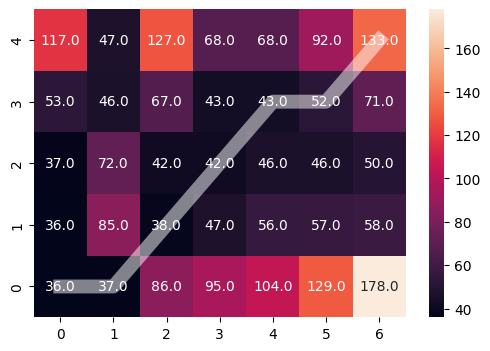

In [60]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sbn.heatmap(R, annot=True, fmt=".1f", ax=ax)
ax.invert_yaxis()

# Get the (x, y) coordinate of each step of the warp path
path_x = [p[1] for p in path]
path_y = [p[0] for p in path]

# Align the path to the center of each cell
path_x_aligned = [x+0.5 for x in path_x]
path_y_aligned = [y+0.5 for y in path_y]

ax.plot(path_x_aligned, path_y_aligned, color='white', linewidth=10, alpha=0.5)
plt.show()